# 实验14：禁忌搜索算法

信计1601 刘泉晟 1130116122

## 实验原理

![theory](theory.png)

## 实验内容

![content](content.png)

## 实验过程

In [490]:
import numpy as np
from numpy.random import shuffle,choice
import matplotlib.pyplot as plt
%matplotlib inline

### 定义权重矩阵

In [6]:
weight = np.array([[12, 7, 9, 7, 9],[8, 9, 6, 6, 6],[7, 17, 12, 14, 9],[15, 14, 6, 6, 10],[4, 10, 7, 10, 9]])
weight

array([[12,  7,  9,  7,  9],
       [ 8,  9,  6,  6,  6],
       [ 7, 17, 12, 14,  9],
       [15, 14,  6,  6, 10],
       [ 4, 10,  7, 10,  9]])

### 构建TS类

In [581]:
class TS:
    def __init__(self,weight,seed = 2018, max_iter = 50, solution_size = 60, max_list_size = 5):
        self.seed = seed
        self.t_list = []
#         self.best = 1e5
        self.solution_size = solution_size
        self.max_list_size = max_list_size
        self.weight = weight
        self.max_iter = max_iter
        self.re = []
        
    #随机生成初始解
    def plan_gen(self):
        work = np.arange(5)
        shuffle(work)
        return work
    
    #插入更新禁忌表
    def insert(self,item):
        if len(self.t_list)+1 > self.max_list_size:
            self.t_list = self.t_list[1:]
        if item not in self.t_list:
            self.t_list.append(item)
    
    #get得分
    def eva(self, plan):
        sum = 0
        for i in range(5):
            sum += weight[i][plan[i]]
        return sum
    
    def swap(self,plan, i, j): 
        temp = plan.copy()
        t = temp[i]
        plan[i] = temp[j]
        plan[j] = t
        return temp
    
    # 进行2-opt交换
    def swap1(self,plan, i, j): 
        temp = plan.copy()
        temp[i:j+1] = temp[i:j+1][::-1]
        return temp
    def search(self):
        iter = 0
        mod = self.plan_gen()
        global_score = 1e5
        cur_best = mod
        global_best = mod
        while iter < self.max_iter:
            iter+=1
            cnt = 0
            cur_score = 1e5 
            #mod
            cur_move = []
            t_score = 1e5
            t_move = []
            
            for it in range(self.solution_size):
                i,j = choice(5,2)
                temp = self.swap(mod, i,j)
                
                score = self.eva(temp)
                move = [mod[i],mod[j]]
                if  score< global_score:#小于当前最优值，不管禁忌，直接更新
                    cur_score = score
                    cur_best = temp.copy()
                    global_score = cur_score
                    global_best = cur_best
                    self.insert(move)
                    mod = cur_best.copy()
                    cnt+=1
                    break
                    
                elif move not in self.t_list:#满足禁忌
                    if score < cur_score:#比之前的值小
                        cur_score = score
                        cur_best = temp
                        cur_move = move
                    cnt+=1
                elif score < t_score:#不满足禁忌 先记下来
                    t_score = score
                    t_best = temp
                    t_move = move
    
            if cnt != 0:
                self.insert(cur_move)
            else:
                print(cnt)
                print(it)
                cur_best = t_best
                self.t_list.remove(t_move)
             
            mod = cur_best.copy()
            self.re.append([global_score,cur_score])
        self.plot()
        return [global_score, global_best]
    def plot(self):
        x = np.asarray(self.re)
        plt.subplot(1,2,1)
        plt.title("Gloable Best")
        plt.plot(x[:,0])
        plt.subplot(1,2,2)
        plt.title("Best Score In Each Iteration")
        plt.plot(x[:,1])
        plt.show()

### 建立对象，进行求解

In [552]:
ts = TS(weight = weight)

### 结果展示

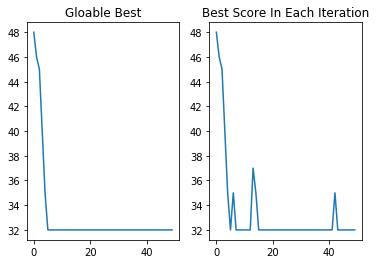

In [553]:
x = ts.search()

In [557]:
上图是求解过程中，整体最优值和迭代最优值的bian

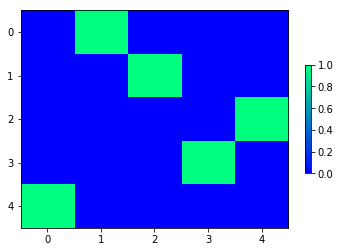

In [580]:
from matplotlib import cm 
m = np.zeros([5,5])
for i in range(5):
    m[i][x[1][i]] = 1
cmap=cm.get_cmap('winter',200)
map=plt.imshow(m,interpolation='nearest',cmap=cmap,aspect='auto',vmin=0,vmax=1)
cb=plt.colorbar(mappable=map,cax=None,ax=None,shrink=0.5)
plt.show()
